# Testing PCA and then Regression

In [19]:
#essentials
import os
import numpy as np
import pandas as pd
import dataframe_image as dfi
from tqdm import tqdm
import pickle
import warnings
warnings.filterwarnings('ignore')

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#tools/metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
import shap

#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#pandas show all columns
pd.set_option('display.max_columns', None)

#%load_ext autoreload
#%autoreload 2
#%run ./__init__

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from fitter import Fitter, get_common_distributions, get_distributions, pd.options.display.max_rows

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error


In [22]:
kp =  pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\KenPom Team Metrics.csv")
kp_conf_rat =  pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\KP_Conf_Ratings.csv")


In [23]:
kp.head(2)

,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed
0,2019,ABILENE CHRISTIAN,Abilene Christian,66.5681,293,66.0042,254,107.1020,87,103.625,186,96.7466,43,101.539,119,2.08626,145,15.0
1,2019,AIR FORCE,Air Force,67.2794,269,66.4070,234,98.7687,274,100.431,250,105.6820,242,107.275,238,-6.84432,241,NaN


In [24]:
kp_conf_rat.head(2)

,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2023,Big 12,1,Big 12 Conference,17.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,Big Ten,2,Big Ten Conference,14.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#data_path = os.path.dirname(os.getcwd()) + '/data' + '/master_table.csv'
#master_table = pd.read_csv(data_path)
#master_table = pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\final_dataset.csv")

In [26]:
#master_table.head()

In [27]:
#list(master_table.columns)

In [123]:
d = pd.read_csv("D:\\Github\\Capstone-project\\Data folder\\final_data_by_player_type.csv")
d = pd.merge(d, kp, left_on=['Team', 'year'], right_on=['TeamName', 'Season'], how='left')
d = pd.merge(d, kp, left_on=['Team_n1', 'year'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(d, kp, left_on=['Team_n1', 'year_n1'], right_on=['TeamName', 'Season'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year'], right_on=['Conf_Abb', 'Year_Conf'], how='left')
df = pd.merge(df, kp_conf_rat, left_on=['conf_abbr_n1', 'year_n1'], right_on=['Conf_Abb', 'Year_Conf'], how='left')

#df['offense'] = df['X.Min_n1']*df['ORtg_n1']
#df['offense'] = df['X.Min_n1']*df['bpm_n1']  #box plus minus
# (stl_per_poss+blk_per_poss+Dreb%)*%Min
df['defence'] = (df['stl_per_poss_n1'] + df['blk_per_poss_n1'] + df['drb_pct_n1']) * df['X.Min_n1']

In [124]:
df.head(2)

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,Unnamed: 10_x,Unnamed: 11_x,Unnamed: 12_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Unnamed: 5_y,Unnamed: 6_y,Unnamed: 7_y,Unnamed: 8_y,Unnamed: 9_y,Unnamed: 10_y,Unnamed: 11_y,Unnamed: 12_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,defence
0,1,1,JACKSONVILLE,JACKSONVILLE,16199.0,aamahne-santos-1,2018-19,A-Sun,32,31,28.6,2.3,6.3,0.361,0.9,2.3,0.4,1.3,4.0,0.339,0.9,0.9,0.966,0.3,1.5,1.8,2.4,0.6,0.1,1.5,1.3,6.8,-4.74,915,73.0,202.0,30.0,75.0,0.4,43.0,127.0,28.0,29.0,10.0,47.0,57,78.0,20.0,2.0,49.0,43.0,217.0,3.2,8.8,1.3,3.3,1.9,5.6,1.2,1.3,2.5,3.4,0.9,0.1,2.1,1.9,9.5,4.4,12.0,1.8,4.5,2.6,7.6,1.7,1.7,3.4,4.7,1.2,0.1,2.9,2.6,12.9,98.5,109.4,7.9,0.503,0.468,0.629,0.144,227.0,1.2,5.8,3.5,13.9,1.2,0.2,18.5,13.8,0.5,0.6,1

In [125]:
df[['X.Min_n1','mp_per_g','games']].describe()

,X.Min_n1,mp_per_g,games
count,11042.000000,11042.000000,11042.000000
mean,48.420766,19.833680,25.684749
std,25.011647,8.984115,9.599929
min,2.000000,1.600000,1.000000
25%,27.825000,12.100000,20.000000
50%,51.500000,20.300000,28.000000
75%,69.700000,27.400000,31.000000
max,96.500000,38.700000,144.000000


In [126]:
filtered_df = df[(df['X.Min_n1']>6) & (df['games']<40)  & (df['games']>7)]
filtered_df

,Unnamed: 0,player_type,Team,Team_n1,Unnamed..0_x,Player.Name,season,conf_abbr,games,games_started,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg2_per_g,fg2a_per_g,fg2_pct,fg3_per_g,fg3a_per_g,fg3_pct,ft_per_g,fta_per_g,ft_pct,orb_per_g,drb_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,sos,mp,fg,fga,fg2,fg2a,fg2_pct.1,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_per_min,fga_per_min,fg2_per_min,fg2a_per_min,fg3_per_min,fg3a_per_min,ft_per_min,fta_per_min,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min,fg_per_poss,fga_per_poss,fg2_per_poss,fg2a_per_poss,fg3_per_poss,fg3a_per_poss,ft_per_poss,fta_per_poss,trb_per_poss,ast_per_poss,stl_per_poss,blk_per_poss,tov_per_poss,pf_per_poss,pts_per_poss,off_rtg,def_rtg,per,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,pprod,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,ows,dws,ws,ws_per_40,obpm,dbpm,bpm,year,Ht,Wt,Yr,G,S,X.Min,ORtg,X.Poss,X.Shots,eFG.,TS.,OR.,DR.,ARate,TORate,Blk.,Stl.,FC.40,FD.40,FTRate,FTM.A,Pct,X2PM.A,Pct.1,X3PM.A,Pct.2,X.Pct,X.2PM.A,X.Pct.1,Unnamed..0_x_n1,Player.Name_n1,season_n1,conf_abbr_n1,games_n1,games_started_n1,mp_per_g_n1,fg_per_g_n1,fga_per_g_n1,fg_pct_n1,fg2_per_g_n1,fg2a_per_g_n1,fg2_pct_n1,fg3_per_g_n1,fg3a_per_g_n1,fg3_pct_n1,ft_per_g_n1,fta_per_g_n1,ft_pct_n1,orb_per_g_n1,drb_per_g_n1,trb_per_g_n1,ast_per_g_n1,stl_per_g_n1,blk_per_g_n1,tov_per_g_n1,pf_per_g_n1,pts_per_g_n1,sos_n1,mp_n1,fg_n1,fga_n1,fg2_n1,fg2a_n1,fg2_pct.1_n1,fg3_n1,fg3a_n1,ft_n1,fta_n1,orb_n1,drb_n1,trb_n1,ast_n1,stl_n1,blk_n1,tov_n1,pf_n1,pts_n1,fg_per_min_n1,fga_per_min_n1,fg2_per_min_n1,fg2a_per_min_n1,fg3_per_min_n1,fg3a_per_min_n1,ft_per_min_n1,fta_per_min_n1,trb_per_min_n1,ast_per_min_n1,stl_per_min_n1,blk_per_min_n1,tov_per_min_n1,pf_per_min_n1,pts_per_min_n1,fg_per_poss_n1,fga_per_poss_n1,fg2_per_poss_n1,fg2a_per_poss_n1,fg3_per_poss_n1,fg3a_per_poss_n1,ft_per_poss_n1,fta_per_poss_n1,trb_per_poss_n1,ast_per_poss_n1,stl_per_poss_n1,blk_per_poss_n1,tov_per_poss_n1,pf_per_poss_n1,pts_per_poss_n1,off_rtg_n1,def_rtg_n1,per_n1,ts_pct_n1,efg_pct_n1,fg3a_per_fga_pct_n1,fta_per_fga_pct_n1,pprod_n1,orb_pct_n1,drb_pct_n1,trb_pct_n1,ast_pct_n1,stl_pct_n1,blk_pct_n1,tov_pct_n1,usg_pct_n1,ows_n1,dws_n1,ws_n1,ws_per_40_n1,obpm_n1,dbpm_n1,bpm_n1,year_n1,Ht_n1,Wt_n1,Yr_n1,G_n1,S_n1,X.Min_n1,ORtg_n1,X.Poss_n1,X.Shots_n1,eFG._n1,TS._n1,OR._n1,DR._n1,ARate_n1,TORate_n1,Blk._n1,Stl._n1,FC.40_n1,FD.40_n1,FTRate_n1,FTM.A_n1,Pct_n1,X2PM.A_n1,Pct.1_n1,X3PM.A_n1,Pct.2_n1,X.Pct_n1,X.2PM.A_n1,X.Pct.1_n1,Season_x,TeamName_x,TeamName 2_x,Tempo_x,RankTempo_x,AdjTempo_x,RankAdjTempo_x,OE_x,RankOE_x,AdjOE_x,RankAdjOE_x,DE_x,RankDE_x,AdjDE_x,RankAdjDE_x,AdjEM_x,RankAdjEM_x,seed_x,Season_y,TeamName_y,TeamName 2_y,Tempo_y,RankTempo_y,AdjTempo_y,RankAdjTempo_y,OE_y,RankOE_y,AdjOE_y,RankAdjOE_y,DE_y,RankDE_y,AdjDE_y,RankAdjDE_y,AdjEM_y,RankAdjEM_y,seed_y,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed,Year_Conf_x,Conf_Abb_x,Conf_Rk_x,Conf_Full_x,Conf_Rating_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,Unnamed: 10_x,Unnamed: 11_x,Unnamed: 12_x,Year_Conf_y,Conf_Abb_y,Conf_Rk_y,Conf_Full_y,Conf_Rating_y,Unnamed: 5_y,Unnamed: 6_y,Unnamed: 7_y,Unnamed: 8_y,Unnamed: 9_y,Unnamed: 10_y,Unnamed: 11_y,Unnamed: 12_y,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,defence
0,1,1,JACKSONVILLE,JACKSONVILLE,16199.0,aamahne-santos-1,2018-19,A-Sun,32,31,28.6,2.3,6.3,0.361,0.9,2.3,0.4,1.3,4.0,0.339,0.9,0.9,0.966,0.3,1.5,1.8,2.4,0.6,0.1,1.5,1.3,6.8,-4.74,915,73.0,202.0,30.0,75.0,0.4,43.0,127.0,28.0,29.0,10.0,47.0,57,78.0,20.0,2.0,49.0,43.0,217.0,3.2,8.8,1.3,3.3,1.9,5.6,1.2,1.3,2.5,3.4,0.9,0.1,2.1,1.9,9.5,4.4,12.0,1.8,4.5,2.6,7.6,1.7,1.7,3.4,4.7,1.2,0.1,2.9,2.6,12.9,98.5,109.4,7.9,0.503,0.468,0.629,0.144,227.0,1.2,5.8,3.5,13.9,1.2,0.2,18.5,13.8,0.5,0.6,1

In [ ]:
# Removed rows where Player Season was termed "career"
#indexrows = all_BR_data[all_BR_data['season']=='Career'].index
#all_BR_data.drop(indexrows , inplace=True)

In [110]:
#filtered_df = df[(df['games']<40)  & (df['games']>7)]
#filtered_df[['Team', 'Player.Name', 'X.Min','season' ]].head(3)
#df_to_use = filtered_df.dropna()

In [112]:
#filtered_df1 = filtered_df[filtered_df['mp_per_g'] > 6]
#filtered_df1
#df = filtered_df1

In [129]:
df = filtered_df

In [131]:
filtered_df[['X.Min_n1','mp_per_g','games']].describe()

,X.Min_n1,mp_per_g,games
count,9981.000000,9981.000000,9981.000000
mean,51.414177,20.451007,25.979361
std,23.083532,8.818748,6.917230
min,6.100000,1.800000,8.000000
25%,32.800000,13.000000,21.000000
50%,54.200000,21.100000,28.000000
75%,70.900000,27.800000,31.000000
max,96.500000,38.700000,39.000000


In [30]:
d[['Player.Name','season','Team','year', 'Team_n1', 'year_n1']].head(5)

,Player.Name,season,Team,year,Team_n1,year_n1
0,aamahne-santos-1,2018-19,JACKSONVILLE,2019.0,JACKSONVILLE,2020.0
1,aamir-simms-1,2018-19,CLEMSON,2019.0,CLEMSON,2020.0
2,aamir-simms-1,2019-20,CLEMSON,2020.0,CLEMSON,2021.0
3,aanen-moody-1,2018-19,NORTH DAKOTA,2019.0,NORTH DAKOTA,2020.0
4,aanen-moody-1,2019-20,NORTH DAKOTA,2020.0,SOUTHERN UTAH,2021.0


In [102]:
df[['Player.Name','season','Team','year', 'Team_n1', 'year_n1','Conf_Rating_x', 'Conf_Rating_y', 'defence']].head(5)

,Player.Name,season,Team,year,Team_n1,year_n1,Conf_Rating_x,Conf_Rating_y,defence
0,aamahne-santos-1,2018-19,JACKSONVILLE,2019.0,JACKSONVILLE,2020.0,-4.43,-4.43,632.40
1,aamir-simms-1,2018-19,CLEMSON,2019.0,CLEMSON,2020.0,15.33,15.33,1676.10
2,aamir-simms-1,2019-20,CLEMSON,2020.0,CLEMSON,2021.0,11.45,11.45,1446.48
3,aanen-moody-1,2018-19,NORTH DAKOTA,2019.0,NORTH DAKOTA,2020.0,-5.49,-5.49,132.60
4,aanen-moody-1,2019-20,NORTH DAKOTA,2020.0,SOUTHERN UTAH,2021.0,-3.53,-2.26,343.48


In [32]:
kp.head(2)

,Season,TeamName,TeamName 2,Tempo,RankTempo,AdjTempo,RankAdjTempo,OE,RankOE,AdjOE,RankAdjOE,DE,RankDE,AdjDE,RankAdjDE,AdjEM,RankAdjEM,seed
0,2019,ABILENE CHRISTIAN,Abilene Christian,66.5681,293,66.0042,254,107.1020,87,103.625,186,96.7466,43,101.539,119,2.08626,145,15.0
1,2019,AIR FORCE,Air Force,67.2794,269,66.4070,234,98.7687,274,100.431,250,105.6820,242,107.275,238,-6.84432,241,NaN


In [33]:
kp_conf_rat.head(2)

,Year_Conf,Conf_Abb,Conf_Rk,Conf_Full,Conf_Rating,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2023,Big 12,1,Big 12 Conference,17.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,Big Ten,2,Big Ten Conference,14.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
list(df.columns)

['Unnamed: 0',
 'player_type',
 'Team',
 'Team_n1',
 'Unnamed..0_x',
 'Player.Name',
 'season',
 'conf_abbr',
 'games',
 'games_started',
 'mp_per_g',
 'fg_per_g',
 'fga_per_g',
 'fg_pct',
 'fg2_per_g',
 'fg2a_per_g',
 'fg2_pct',
 'fg3_per_g',
 'fg3a_per_g',
 'fg3_pct',
 'ft_per_g',
 'fta_per_g',
 'ft_pct',
 'orb_per_g',
 'drb_per_g',
 'trb_per_g',
 'ast_per_g',
 'stl_per_g',
 'blk_per_g',
 'tov_per_g',
 'pf_per_g',
 'pts_per_g',
 'sos',
 'mp',
 'fg',
 'fga',
 'fg2',
 'fg2a',
 'fg2_pct.1',
 'fg3',
 'fg3a',
 'ft',
 'fta',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'fg_per_min',
 'fga_per_min',
 'fg2_per_min',
 'fg2a_per_min',
 'fg3_per_min',
 'fg3a_per_min',
 'ft_per_min',
 'fta_per_min',
 'trb_per_min',
 'ast_per_min',
 'stl_per_min',
 'blk_per_min',
 'tov_per_min',
 'pf_per_min',
 'pts_per_min',
 'fg_per_poss',
 'fga_per_poss',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_per_poss',
 'fg3a_per_poss',
 'ft_per_poss',
 'fta_per_poss',
 'trb_per_poss',
 'ast_per_

In [133]:
list(df.columns[(df. dtypes == 'float64') | (df. dtypes == 'int64') ])

['Unnamed: 0',
 'player_type',
 'Unnamed..0_x',
 'games',
 'games_started',
 'mp_per_g',
 'fg_per_g',
 'fga_per_g',
 'fg2_per_g',
 'fg2a_per_g',
 'fg3_per_g',
 'fg3a_per_g',
 'ft_per_g',
 'fta_per_g',
 'orb_per_g',
 'drb_per_g',
 'trb_per_g',
 'ast_per_g',
 'stl_per_g',
 'blk_per_g',
 'tov_per_g',
 'pf_per_g',
 'pts_per_g',
 'sos',
 'mp',
 'fg',
 'fga',
 'fg2',
 'fg2a',
 'fg3',
 'fg3a',
 'ft',
 'fta',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'fg_per_min',
 'fga_per_min',
 'fg2_per_min',
 'fg2a_per_min',
 'fg3_per_min',
 'fg3a_per_min',
 'ft_per_min',
 'fta_per_min',
 'trb_per_min',
 'ast_per_min',
 'stl_per_min',
 'blk_per_min',
 'tov_per_min',
 'pf_per_min',
 'pts_per_min',
 'fg_per_poss',
 'fga_per_poss',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_per_poss',
 'fg3a_per_poss',
 'ft_per_poss',
 'fta_per_poss',
 'trb_per_poss',
 'ast_per_poss',
 'stl_per_poss',
 'blk_per_poss',
 'tov_per_poss',
 'pf_per_poss',
 'pts_per_poss',
 'off_rtg',
 'def_rtg',
 'per',

In [134]:
df = df.replace(to_replace="NO IDEA",value=0)
df = df.replace(to_replace="---",value=0)
df = df.fillna(0)
pd.options.display.max_columns

In [135]:
columns = ['games','games_started','mp_per_g','fg_per_g','fga_per_g','fg2_per_g','fg2a_per_g','fg3_per_g','fg3a_per_g','ft_per_g','fta_per_g','orb_per_g','drb_per_g','trb_per_g','ast_per_g','stl_per_g','blk_per_g','tov_per_g','pf_per_g','pts_per_g','sos','mp','fg','fga','fg2','fg2a','fg3','fg3a','ft','fta','orb','drb','trb','ast','stl','blk','tov','pf','pts','fg_per_min','fga_per_min','fg2_per_min','fg2a_per_min','fg3_per_min','fg3a_per_min','ft_per_min','fta_per_min','trb_per_min','ast_per_min','stl_per_min','blk_per_min','tov_per_min','pf_per_min','pts_per_min','fg_per_poss','fga_per_poss','fg2_per_poss','fg2a_per_poss','fg3_per_poss','fg3a_per_poss','ft_per_poss','fta_per_poss','trb_per_poss','ast_per_poss','stl_per_poss','blk_per_poss','tov_per_poss','pf_per_poss','pts_per_poss','off_rtg','def_rtg','per','ts_pct','efg_pct','fg3a_per_fga_pct','fta_per_fga_pct','pprod','orb_pct','drb_pct','trb_pct','ast_pct','stl_pct','blk_pct','tov_pct','usg_pct','ows','dws','ws','ws_per_40','obpm','dbpm','bpm','year','Ht','Wt','G','S','X.Min','ORtg','X.Poss','X.Shots','eFG.','TS.','OR.','DR.','ARate','TORate','Blk.','Stl.','FC.40','FD.40','FTRate','Pct.2','X.Pct','X.Pct.1','Season_x','Tempo_x','RankTempo_x','AdjTempo_x','RankAdjTempo_x','OE_x','RankOE_x','AdjOE_x','RankAdjOE_x','DE_x','RankDE_x','AdjDE_x','RankAdjDE_x','AdjEM_x','RankAdjEM_x','seed_x','Season_y','Tempo_y','RankTempo_y','AdjTempo_y','RankAdjTempo_y','OE_y','RankOE_y','AdjOE_y','RankAdjOE_y','DE_y','RankDE_y','AdjDE_y','RankAdjDE_y','AdjEM_y','RankAdjEM_y','seed_y', 'Year_Conf_x','Conf_Rk_x','Conf_Rating_x','Year_Conf_y','Conf_Rk_y','Conf_Rating_y']

In [136]:
master_table  = df[columns]
print(master_table.shape)

(9981, 153)


In [137]:
y = df['defence'].to_frame()
y.shape

(9981, 1)

In [138]:
from sklearn.decomposition import PCA

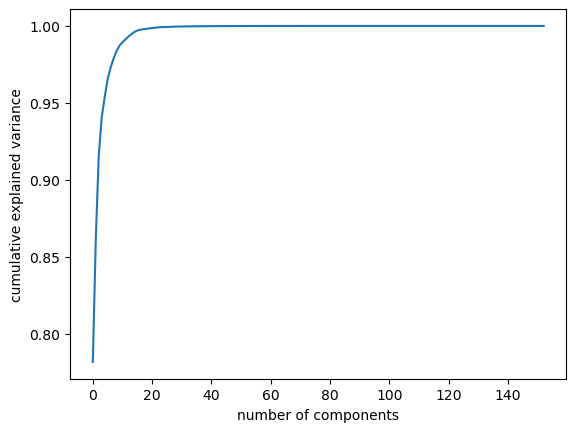

In [139]:
pca = PCA().fit(master_table)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [140]:
pca = PCA(n_components=20)
projected= pca.fit_transform(master_table)
print(projected.shape)

(9981, 20)


In [141]:
pca_components = pd.DataFrame(projected)

In [142]:
pca_components.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-501.637672,465.343886,-43.195968,-289.504517,177.451693,25.255904,-172.267453,-10.488735,-132.826951,-25.914257,17.633852,9.708442,-151.897328,-1.700638,-80.613168,4.291957,-31.563864,-2.308075,7.280587,0.384240
1,-466.528830,552.370471,-57.842728,346.608818,-154.961217,-23.321528,-158.967765,-24.867136,-61.252872,-18.775713,5.501406,60.317558,-25.588785,7.325388,-61.493668,-3.317808,67.565741,-8.662416,18.572570,-41.986131


In [143]:
pca_components.shape

(9981, 20)

In [144]:
# split the data with 90% in training set
X_train, X_test, y_train, y_test = train_test_split(pca_components, y, random_state=0,
                                    train_size=0.9)


In [145]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8982, 20)
(999, 20)
(8982, 1)
(999, 1)


In [146]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                LinearRegression(**kwargs))

In [49]:
param_grid = {'polynomialfeatures__degree': np.arange(7)}

In [50]:
#grid = GridSearchCV(PolynomialRegression(), param_grid, cv=3)

In [51]:
#grid.fit(X_train, y_train)  # Fitting the data to the model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6])})

In [147]:
grid.best_params_

{'polynomialfeatures__degree': 1}

In [148]:
model = grid.best_estimator_

In [149]:
y_predict = model.fit(X_train, y_train).predict(X_test)

In [150]:
y_predict.shape

(999, 1)

In [151]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error

print(r2_score(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))
print(median_absolute_error(y_test, y_predict))
print(max_error(y_test, y_predict))

0.3541180510614872
148833.403109981
255.24127724106188
1734.362141307624


In [152]:
results = pd.DataFrame(np.hstack((y_test, y_predict)), columns=['original_value', 'predicted_value'])

In [153]:
results.head(3)

,original_value,predicted_value
0,213.36,515.897381
1,344.85,720.014396
2,824.88,1230.593625


In [154]:
threshhold = 0.15
results['status'] = ((abs(results['original_value']-results['predicted_value']))/results['original_value']).apply(lambda x: 1 if x<=threshhold else 0)

In [155]:
results['status'].sum()

264

In [156]:
accuracy = (results['status'].sum() / results['status'].count()) * 100
print(accuracy)

26.426426426426424


In [62]:
'''
# evaluate a logistic regression model using k-fold cross-validation
#from numpy import mean
#from numpy import std
#from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

'''

"\n# evaluate a logistic regression model using k-fold cross-validation\n#from numpy import mean\n#from numpy import std\n#from sklearn.datasets import make_classification\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\n#from sklearn.linear_model import LogisticRegression\n# create dataset\n#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)\n# prepare the cross-validation procedure\ncv = KFold(n_splits=10, random_state=1, shuffle=True)\n# create model\nmodel = LogisticRegression()\n# evaluate model\nscores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)\n# report performance\nprint('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))\n\n"

In [157]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [158]:
model_lr = LinearRegression()

In [159]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.3814521 , 0.34798464, 0.36239795, 0.31810285, 0.32508481])

In [66]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 20))}]


# step-3: perform grid search
# 3.1 specify model
#lm = LinearRegression()
lm = XGBRegressor()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params,
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance...
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19]}],
             return_train_score=True, scoring='r2', verbose=1)

In [161]:
# predict prices of X_test
y_pred = model_cv.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

-0.03596407976803451


In [162]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [163]:
xg_reg = XGBRegressor(n_estimators=20,max_depth=7,learning_rate=0.2745)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2745, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [164]:
# predict prices of X_test
y_pred1 = xg_reg.predict(X_test)
r2 = r2_score(y_test, y_pred1)
print(r2)

0.3403153341977154


In [165]:
lgbm_reg = LGBMRegressor(n_estimators=23, max_depth=4,
                         learning_rate=0.15, num_leaves=28, boosting_type='goss',random_state = 0,)
lgbm_reg.fit(X_train, y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 8982, number of used features: 20
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 852.099441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

LGBMRegressor(boosting_type='goss', learning_rate=0.15, max_depth=4,
              n_estimators=23, num_leaves=28, random_state=0)

In [166]:
# predict prices of X_test
y_pred_lgbm = xg_reg.predict(X_test)
r2 = r2_score(y_test, y_pred_lgbm)
print(r2)

0.3403153341977154


In [167]:
y_test.shape

(999, 1)

In [168]:
y_pred_lgbm = y_pred_lgbm[:,np. newaxis]
y_pred_lgbm.shape

(999, 1)

In [169]:
results1 = pd.DataFrame(np.hstack((y_test, y_pred_lgbm)), columns=['original_value', 'predicted_value'])

In [172]:
threshhold = 0.15
results1['status'] = ((abs(results1['original_value']-results1['predicted_value']))/results1['original_value']).apply(lambda x: 1 if x<=threshhold else 0)

In [173]:
accuracy = (results1['status'].sum() / results1['status'].count()) * 100
print(accuracy)

26.026026026026027
